# Cosmic Watch Data Analysis

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch.

In [1]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.


data = pd.read_csv('https://raw.githubusercontent.com/dkallenberg/Quarknet-CosmicWatch-ipynb/main/CW_A_Data2023_Jul_10.csv')

data

,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,6451,399,87.30,1483,26.05
1,2,13640,355,68.30,2777,26.05
2,3,14714,480,130.21,2964,26.05
3,4,21895,608,202.86,4266,26.05
4,5,25540,433,104.37,5015,26.05
...,...,...,...,...,...,...
9402,9403,81949268,377,76.28,15309391,27.67
9403,9404,81954456,361,70.62,15310329,27.67
9404,9405,81955533,403,88.99,15310520,27.67
9405,9406,81977392,402,87.25,15314636,27.67


Next we are going to plot a hystogram of the event voltages, in part to see that the data was importated correctly, and also to see how it compares to other data sets.

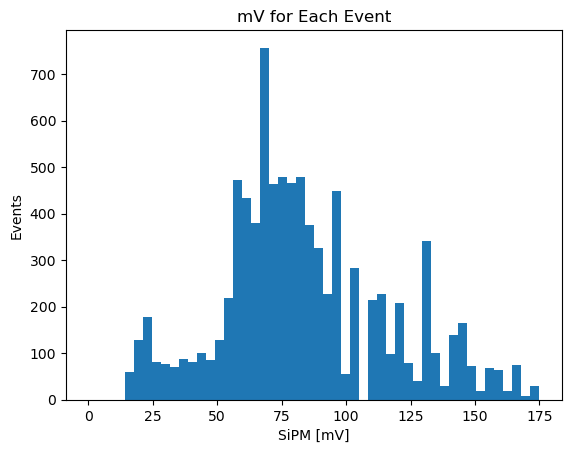

In [2]:
# This makes a histogram of that totally useless calculation above
plt.hist(data.SiPM, bins=50, range=[0,175], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");

It takes time for the CosmicWatch's processor to evaluate and report on events, this time is considered down time. The system reports out the down time, we need to use this to calculate the up time, the time when the Cosmic Watch was waiting for a hit. Using the up time we can calculate a rate for every event.

In [3]:
data['UpTime'] = (data.RunTime - data.DownTime)
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
data['Minute']= (data.UpTime/(60000))
data.Minute = round(data.Minute,0)
data['avgRate'] = data.Event/(data.UpTime/1000)
data

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,6451,399,87.30,1483,26.05,4968,0 days 00:00:04.968000,0.0,0.201288
1,2,13640,355,68.30,2777,26.05,10863,0 days 00:00:10.863000,0.0,0.184111
2,3,14714,480,130.21,2964,26.05,11750,0 days 00:00:11.750000,0.0,0.255319
3,4,21895,608,202.86,4266,26.05,17629,0 days 00:00:17.629000,0.0,0.226899
4,5,25540,433,104.37,5015,26.05,20525,0 days 00:00:20.525000,0.0,0.243605
...,...,...,...,...,...,...,...,...,...,...
9402,9403,81949268,377,76.28,15309391,27.67,66639877,0 days 18:30:39.877000,1111.0,0.141102
9403,9404,81954456,361,70.62,15310329,27.67,66644127,0 days 18:30:44.127000,1111.0,0.141108
9404,9405,81955533,403,88.99,15310520,27.67,66645013,0 days 18:30:45.013000,1111.0,0.141121
9405,9406,81977392,402,87.25,15314636,27.67,66662756,0 days 18:31:02.756000,1111.0,0.141098


In [4]:
Data1Min = data.drop_duplicates(subset=['Minute'], keep='first')
Data1Min = Data1Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,6451,1483,4968,0 days 00:00:04.968000,0.0,0.201288
7,8,37881,7240,30641,0 days 00:00:30.641000,1.0,0.261088
21,22,124293,23392,100901,0 days 00:01:40.901000,2.0,0.218036
31,32,188461,35271,153190,0 days 00:02:33.190000,3.0,0.208891
39,40,272336,50944,221392,0 days 00:03:41.392000,4.0,0.180675
...,...,...,...,...,...,...,...
9372,9373,81647315,15252666,66394649,0 days 18:26:34.649000,1107.0,0.141171
9381,9382,81753974,15272654,66481320,0 days 18:28:01.320000,1108.0,0.141122
9385,9386,81791495,15279772,66511723,0 days 18:28:31.723000,1109.0,0.141118
9391,9392,81866419,15293777,66572642,0 days 18:29:32.642000,1110.0,0.141079


In [5]:
Data1Min['DeltaCount'] = Data1Min.Event - Data1Min.Event.shift(1)

Data1Min['DeltaUpTime'] = Data1Min.UpTime - Data1Min.UpTime.shift(1)

Data1Min['Rate'] = Data1Min.DeltaCount / (Data1Min.DeltaUpTime /1000)
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,6451,1483,4968,0 days 00:00:04.968000,0.0,0.201288,NaN,NaN,NaN
7,8,37881,7240,30641,0 days 00:00:30.641000,1.0,0.261088,7.0,25673.0,0.272660
21,22,124293,23392,100901,0 days 00:01:40.901000,2.0,0.218036,14.0,70260.0,0.199260
31,32,188461,35271,153190,0 days 00:02:33.190000,3.0,0.208891,10.0,52289.0,0.191245
39,40,272336,50944,221392,0 days 00:03:41.392000,4.0,0.180675,8.0,68202.0,0.117299
...,...,...,...,...,...,...,...,...,...,...
9372,9373,81647315,15252666,66394649,0 days 18:26:34.649000,1107.0,0.141171,13.0,64431.0,0.201766
9381,9382,81753974,15272654,66481320,0 days 18:28:01.320000,1108.0,0.141122,9.0,86671.0,0.103841
9385,9386,81791495,15279772,66511723,0 days 18:28:31.723000,1109.0,0.141118,4.0,30403.0,0.131566
9391,9392,81866419,15293777,66572642,0 days 18:29:32.642000,1110.0,0.141079,6.0,60919.0,0.098491


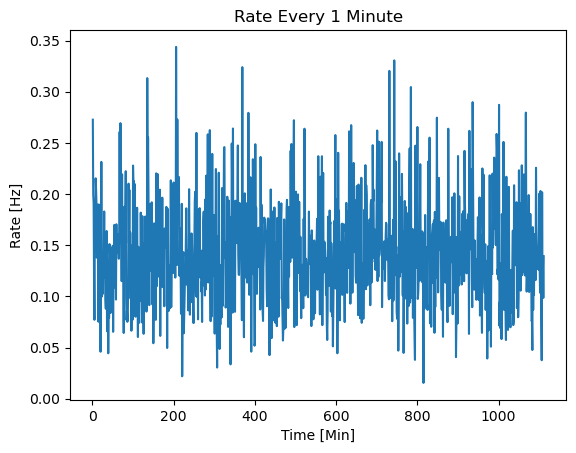

In [6]:
plt.plot(Data1Min.Minute,Data1Min.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

In [7]:
#Data5Min = pd.DataFrame(columns=['Event','DownTime','Uptime','Minute'])
Data5Min = Data1Min.query('Minute % 5 == 0')

Data5Min = Data5Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,6451,1483,4968,0 days 00:00:04.968000,0.0,0.201288
43,44,335891,62596,273295,0 days 00:04:33.295000,5.0,0.160998
100,101,712531,132677,579854,0 days 00:09:39.854000,10.0,0.174182
144,145,1096873,203971,892902,0 days 00:14:52.902000,15.0,0.162392
180,181,1444988,268487,1176501,0 days 00:19:36.501000,20.0,0.153846
...,...,...,...,...,...,...,...
9224,9225,80405988,15020031,65385957,0 days 18:09:45.957000,1090.0,0.141085
9271,9272,80763933,15087204,65676729,0 days 18:14:36.729000,1095.0,0.141176
9315,9316,81125715,15155097,65970618,0 days 18:19:30.618000,1100.0,0.141214
9357,9358,81502552,15225532,66277020,0 days 18:24:37.020000,1105.0,0.141195


In [8]:
Data5Min['DeltaCount'] = Data5Min.Event - Data5Min.Event.shift(1)
Data5Min['DeltaUpTime'] = Data5Min.UpTime - Data5Min.UpTime.shift(1)
Data5Min['Rate'] = Data5Min.DeltaCount / (Data5Min.DeltaUpTime /1000)


Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,6451,1483,4968,0 days 00:00:04.968000,0.0,0.201288,NaN,NaN,NaN
43,44,335891,62596,273295,0 days 00:04:33.295000,5.0,0.160998,43.0,268327.0,0.160252
100,101,712531,132677,579854,0 days 00:09:39.854000,10.0,0.174182,57.0,306559.0,0.185935
144,145,1096873,203971,892902,0 days 00:14:52.902000,15.0,0.162392,44.0,313048.0,0.140554
180,181,1444988,268487,1176501,0 days 00:19:36.501000,20.0,0.153846,36.0,283599.0,0.126940
...,...,...,...,...,...,...,...,...,...,...
9224,9225,80405988,15020031,65385957,0 days 18:09:45.957000,1090.0,0.141085,43.0,315480.0,0.136300
9271,9272,80763933,15087204,65676729,0 days 18:14:36.729000,1095.0,0.141176,47.0,290772.0,0.161639
9315,9316,81125715,15155097,65970618,0 days 18:19:30.618000,1100.0,0.141214,44.0,293889.0,0.149716
9357,9358,81502552,15225532,66277020,0 days 18:24:37.020000,1105.0,0.141195,42.0,306402.0,0.137075


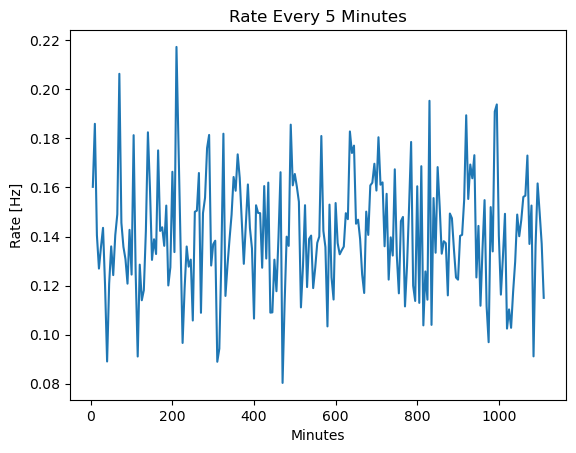

In [9]:
plt.plot(Data5Min.Minute,Data5Min.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

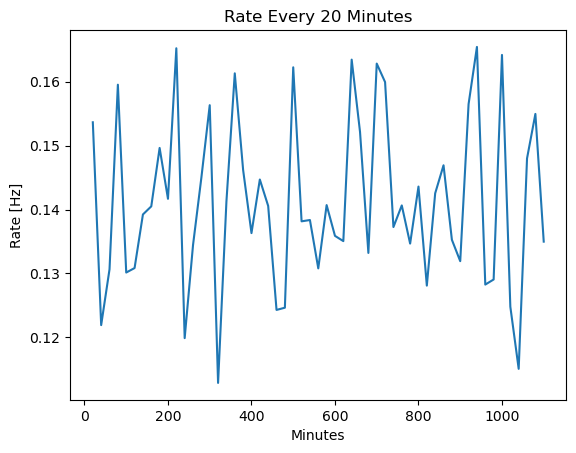

In [10]:
Data20Min = Data1Min.query('Minute % 20 == 0')

Data20Min = Data20Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data20Min['DeltaCount'] = Data20Min.Event - Data20Min.Event.shift(1)

Data20Min['DeltaUpTime'] = Data20Min.UpTime - Data20Min.UpTime.shift(1)

Data20Min['Rate'] = Data20Min.DeltaCount / (Data20Min.DeltaUpTime /1000)

plt.plot(Data20Min.Minute,Data20Min.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");